In [14]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [28]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]

In [17]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [19]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [20]:
def sigmoid(z):
    s=1/(1+np.exp(-z))  
    return s

In [21]:
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.0
    return w, b

In [22]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A=sigmoid((np.dot(w.T,X)+b))
    cost=-(np.sum((((Y*np.log(A)))+(((1-Y)*np.log(1-A)))))/m)
    dw= np.dot(X,(A-Y).T)/m
    db= np.sum(A-Y)/m
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [23]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    for i in range(num_iterations):
        grads, cost= propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)
        # Record the costs
        if (i%num_iterations == 0):
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [24]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction

In [25]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=True):
    
    a=X_train.shape[0]
    w, b = initialize_with_zeros(a)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=True)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [26]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


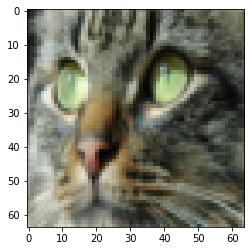

In [44]:
index = 48
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")